In [174]:
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np
import io

 trzebo wybrac plik "letters.data"

In [175]:
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['letters.data']), header=None)

Saving letters.data to letters (10).data


In [176]:
all_pixels = df.iloc[:, :35].values
all_outputs = df.iloc[:, 35:].values
my_pixels = np.array([])
my_outputs = np.array([])
# My set [6, 7, 11, 17, 18, 20, 21, 23, 24, 25]
example_set = [6, 7, 11, 17, 18, 20, 21, 23, 24, 25]
for id in example_set:
    my_pixels = np.append(my_pixels, all_pixels[id])
    outputs = np.array([])
    for id2 in example_set:
      outputs = np.append(outputs, all_outputs[id][id2])
    my_outputs = np.append(my_outputs, outputs)

my_pixels = my_pixels.reshape((-1, 35))
my_outputs = my_outputs.reshape((-1, 10))

In [177]:
my_pixels

array([[-1.,  1.,  1.,  1., -1.,  1., -1., -1., -1.,  1.,  1., -1., -1.,
        -1., -1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1.,
        -1., -1., -1.,  1., -1.,  1.,  1.,  1., -1.],
       [ 1., -1., -1., -1.,  1.,  1., -1., -1., -1.,  1.,  1., -1., -1.,
        -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1.,
        -1., -1., -1.,  1.,  1., -1., -1., -1.,  1.],
       [ 1., -1., -1., -1., -1.,  1., -1., -1., -1., -1.,  1., -1., -1.,
        -1., -1.,  1., -1., -1., -1., -1.,  1., -1., -1., -1., -1.,  1.,
        -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1., -1.,  1., -1., -1., -1.,  1.,  1., -1., -1.,
        -1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1., -1., -1.,  1.,
        -1., -1.,  1., -1.,  1., -1., -1., -1.,  1.],
       [-1.,  1.,  1.,  1., -1.,  1., -1., -1., -1.,  1.,  1., -1., -1.,
        -1., -1., -1.,  1.,  1.,  1., -1., -1., -1., -1., -1.,  1.,  1.,
        -1., -1., -1.,  1., -1.,  1.,  1.,  1., -1.],


Inputs

In [178]:
my_outputs

array([[ 1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1.,  1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1.,  1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1.,  1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1.,  1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1.,  1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1.,  1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1.,  1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.]])

Outputs

In [179]:
class Perceptron(object):

  def __init__(self, eta = 0.001, n_iter=10, random_state = 1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self,X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
    self.errors_ = []
    for _ in range(self.n_iter):
      errors = 0
      for xi , target in zip(X,y):
        update = self.eta * (target - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self

  def net_input(self,X):
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def predict(self, X):
    return np.where(self.net_input(X) >= 0.0, 1, -1)



class SLP(object):
  def __init__(self, eta=0.001, n_iter=10, random_state=1):
    self.eta  = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    self.errors_ = np.zeros(y[0].shape)
    self.perceptrons = [Perceptron(eta=self.eta, n_iter=self.n_iter, random_state=self.random_state) for _ in range(len(X))]
    for perceptron, outputs in zip(self.perceptrons, y):
      perceptron.fit(X, outputs)
      self.errors_ += perceptron.errors_
    return self.perceptrons


  def predict(self, X):
      return [perceptron.predict(X) for perceptron in self.perceptrons]

  def misclassified(self, X, y):
    slp_out = np.array(self.predict(X))
    corr_out = np.array(y)
    mistake = np.sum(slp_out != corr_out)
    return mistake

  def show(self, X):
      fig, axes = plt.subplots(1, 10, figsize=(20,20))
      for i, ax in enumerate(axes.flatten()):
          image = X[i].reshape(7, 5)
          ax.imshow(image, cmap='gray_r')
          ax.axis('off')
      plt.show()



def damage(X,percent,seed = 1):
  rgen = np.random.RandomState(seed)
  result = np.array(X)
  count = int(X.shape[1]*percent/100)

  for index_example in range(len(X)):
    order = np.sort(rgen.choice(X.shape[1],count,replace = False))
    for index_pixel in order:
      result[index_example][index_pixel] *=-1

  return result


In [180]:
net = SLP()

In [181]:
damaged5 = damage(my_pixels ,5)
damaged15 = damage(my_pixels,15)
damaged40 = damage(my_pixels,40)

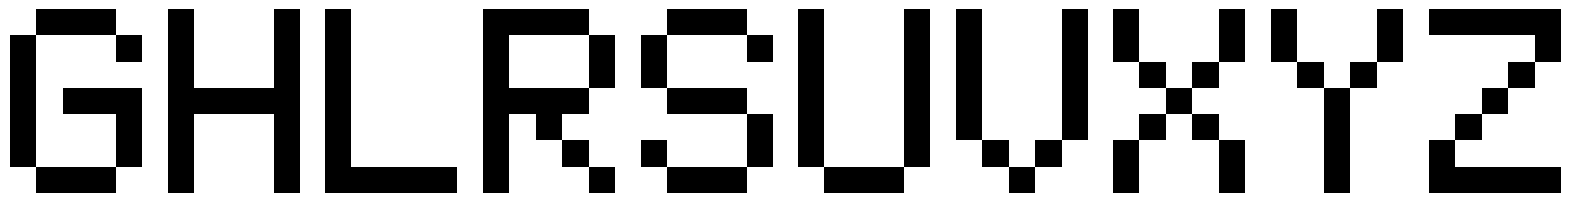

In [182]:
net.show(my_pixels)


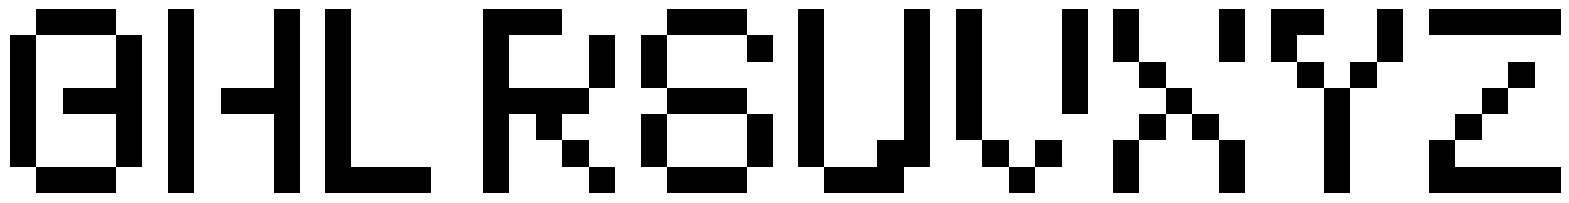

In [183]:
net.show(damaged5)

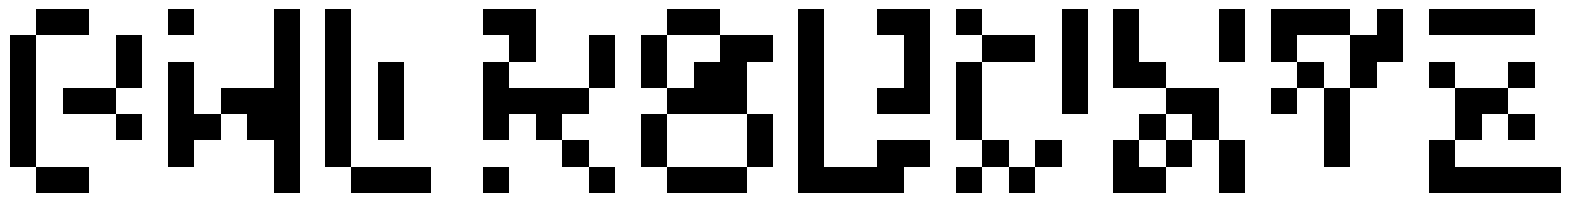

In [184]:
net.show(damaged15)

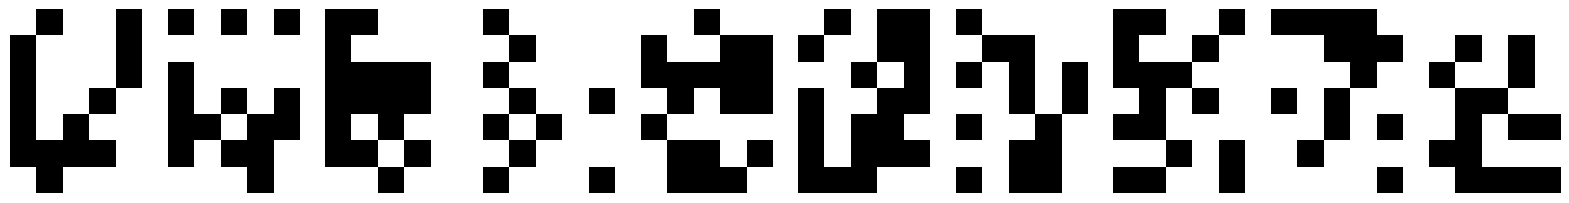

In [185]:
net.show(damaged40)

In [186]:
net.fit(my_pixels,my_outputs)

In [187]:
net.errors_

array([50., 20.,  6.,  3.,  1.,  1.,  0.,  0.,  0.,  0.])

In [188]:
net.predict(my_pixels)

[array([ 1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1,  1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1,  1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1,  1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1,  1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1,  1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1,  1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1,  1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1,  1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1,  1])]

In [189]:
net.misclassified(my_pixels,my_outputs)

0

In [190]:
net.predict(damaged5)

[array([ 1, -1, -1, -1,  1, -1, -1, -1, -1, -1]),
 array([-1,  1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1,  1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1,  1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1,  1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1,  1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1,  1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1,  1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1,  1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1,  1])]

In [191]:
net.misclassified(damaged5,my_outputs)

1

In [192]:
net.predict(damaged15)

[array([ 1, -1, -1, -1,  1, -1, -1, -1, -1, -1]),
 array([-1,  1, -1,  1,  1, -1, -1, -1, -1, -1]),
 array([-1, -1,  1, -1,  1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1,  1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1,  1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1,  1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1,  1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1,  1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1,  1])]

In [193]:
net.misclassified(damaged15,my_outputs)

5

In [194]:
net.predict(damaged40)

[array([-1, -1, -1, -1,  1,  1, -1, -1,  1, -1]),
 array([ 1, -1, -1, -1,  1,  1, -1, -1,  1, -1]),
 array([ 1, -1,  1,  1,  1,  1,  1, -1,  1,  1]),
 array([ 1, -1,  1, -1, -1,  1, -1, -1,  1, -1]),
 array([-1, -1, -1, -1,  1,  1, -1, -1,  1,  1]),
 array([ 1, -1, -1, -1,  1,  1,  1, -1, -1, -1]),
 array([ 1, -1, -1, -1, -1,  1,  1, -1,  1, -1]),
 array([-1, -1, -1, -1, -1,  1, -1, -1,  1, -1]),
 array([-1, -1,  1, -1,  1,  1, -1, -1,  1, -1]),
 array([-1, -1, -1, -1, -1,  1, -1, -1,  1,  1])]

In [195]:
net.misclassified(damaged40,my_outputs)

38